# Decision Tree Without SMOTE

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
dtdata = pd.read_csv('./pipeline1.csv', header=0)
dtdata.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-1.036838,1.569866,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.354717,1.832073,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,1.002737,0.722460,-0.533268,1,...,0,0,1,0,1,1,0,0,0,0


In [3]:
dtdata.columns.values

array(['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',


In [4]:
feature_cols = ['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'SeasonBins_1', 'SeasonBins_2', 'SeasonBins_3', 'SeasonBins_4']
X = dtdata[feature_cols] # Features
y = dtdata.RevenueEnc # Target variable

## Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 

## Build the model

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Confusion Matrix and Classification Report

In [7]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

[[2862  269]
 [ 264  304]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3131
           1       0.53      0.54      0.53       568

    accuracy                           0.86      3699
   macro avg       0.72      0.72      0.72      3699
weighted avg       0.86      0.86      0.86      3699

F1 Score: 0.5328659070990359
AUC: 0.7246481122442094


## Visualize the Decision Tree(s)

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
               filled=True, rounded=True,
              special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('P1shoppingdt1.png')
Image(graph.create_png())

InvocationException: Program terminated with status: -9. stderr follows: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.741519 to fit


## Create New Optimized Tree

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## New Model Evaluation

## Confusion Matrix and Classification Report

In [10]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

[[2940  191]
 [ 252  316]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3131
           1       0.62      0.56      0.59       568

    accuracy                           0.88      3699
   macro avg       0.77      0.75      0.76      3699
weighted avg       0.88      0.88      0.88      3699

F1 Score: 0.587906976744186
AUC: 0.7476675768440088


## Visualize the New Model

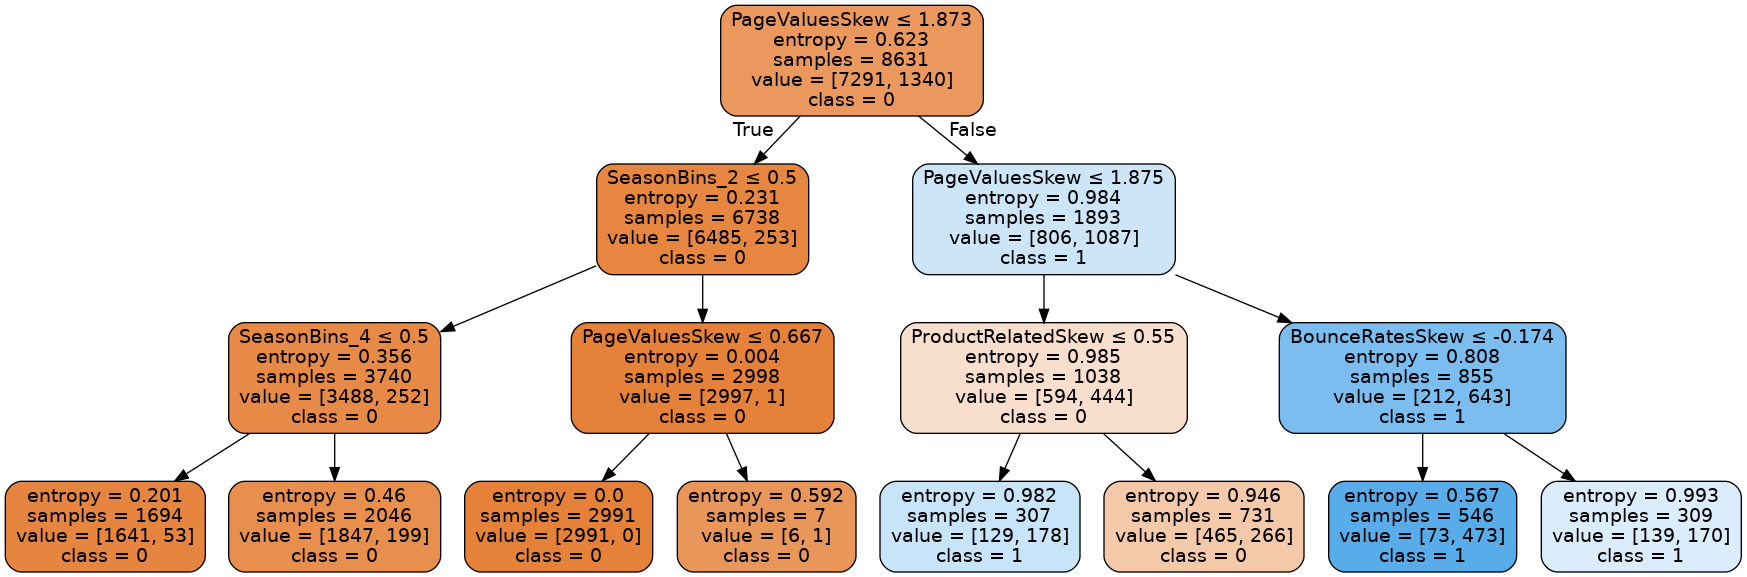

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('P1shoppingdt2.png')
Image(graph.create_png())

# Decision Trees with SMOTE

## Apply SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

#create  oversampled data to train on
oversampler = SMOTE(random_state = 2019)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

## Build the model

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_oversampled,y_train_oversampled)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Confusion Matrix and Classification Report

In [16]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

[[2819  312]
 [ 218  350]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3131
           1       0.53      0.62      0.57       568

    accuracy                           0.86      3699
   macro avg       0.73      0.76      0.74      3699
weighted avg       0.87      0.86      0.86      3699

F1 Score: 0.5691056910569106
AUC: 0.7582742542768589


## Visualize the Decision Tree(s)

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
               filled=True, rounded=True,
              special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('P1shoppingdt3.png')
Image(graph.create_png())

InvocationException: Program terminated with status: -9. stderr follows: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.555081 to fit


## Create New Optimized Tree

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_oversampled,y_train_oversampled)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## New Model Evaluation

## Confusion Matrix and Classification Report

In [19]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

[[2763  368]
 [ 120  448]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.55      0.79      0.65       568

    accuracy                           0.87      3699
   macro avg       0.75      0.84      0.78      3699
weighted avg       0.90      0.87      0.88      3699

F1 Score: 0.6473988439306358
AUC: 0.835599030143814


## Visualize the New Model

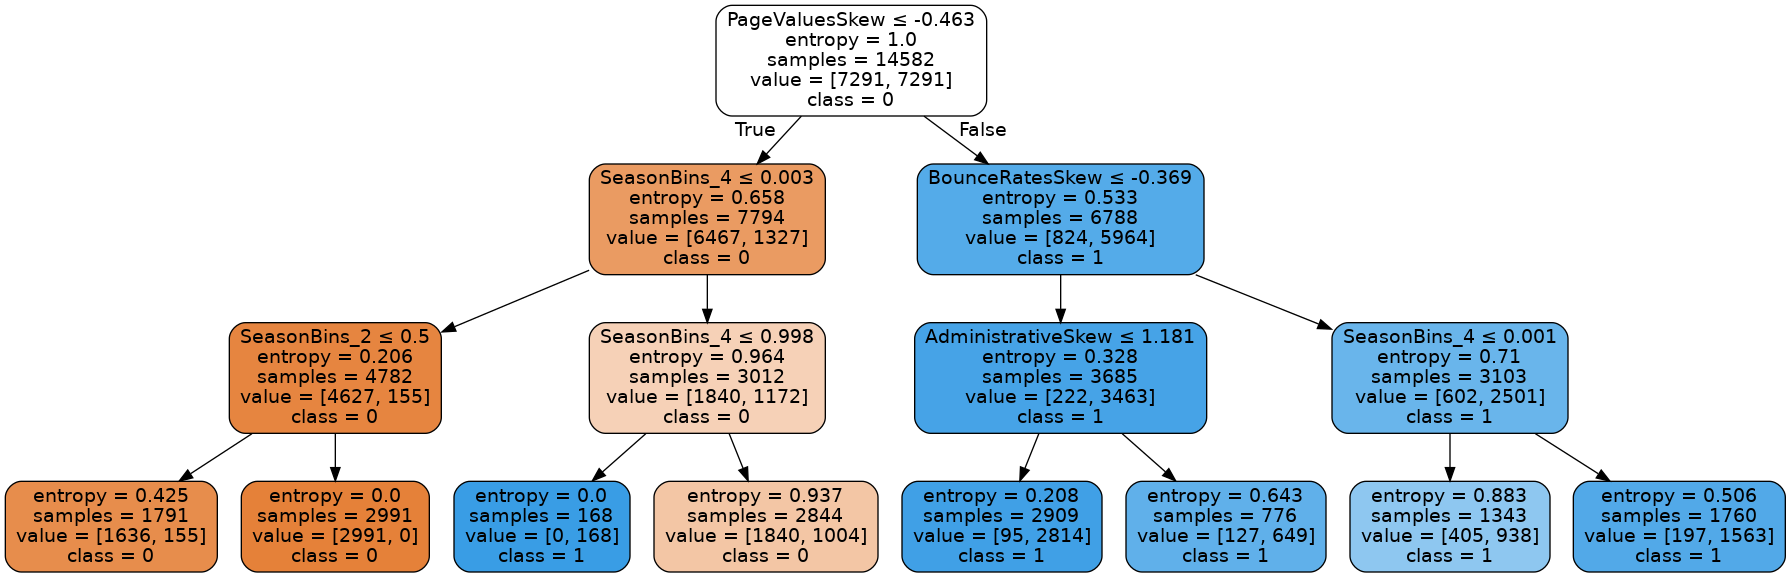

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('P1shoppingdt4.png')
Image(graph.create_png())